In [49]:
# import tensorflow as tf
import glob
import os
from PIL import Image
import numpy as np

data_path = "./data"
w, h = 224, 224
channels = 3
label_names = ['chihuahua', 'cat']

def load(path, type, label_names):
    assert(type in ['test', 'train', 'val'])
    images = []
    labels = []
    path = f"data/{type}"
    for filename in glob.iglob(f"{path}/*/*"):
        label = filename[:filename.rfind('/')]
        label = label[label.rfind('/')+1:]
        img = Image.open(filename)
        img = img.resize((w, h))
        np_img = np.asarray(img)

        if np_img.ndim != 3:
            print("skip")
            continue
        images.append(np_img / 255)
        labels.append((np.array(label_names) == label) * 1)
    
    return {'images': np.array(images), 'labels': np.array(labels)}

training_data = load(data_path, type="train", label_names=label_names)
test_data = load(data_path, type="test", label_names=label_names)
val_data = load(data_path, type="val", label_names=label_names)

# shuffle
import random
shuffled_idx = list(range(len(training_data['images'])))
random.shuffle(shuffled_idx)
shuffled_idx = np.array(shuffled_idx)
training_data['images'] = training_data['images'][shuffled_idx]
training_data['labels'] = training_data['labels'][shuffled_idx]

skip
skip
skip
skip


In [14]:
# preprocessing

# def preprocess(dataset):
#     images, labels = dataset["images"], dataset["labels"]
#     for i in range(len(images)):
#         images[i] = images[i].resize((w,h))
#         np_img = img.resize()


In [47]:
# for x in training_data['images']:
#     print(x.shape)
print(training_data['images'].shape)
print(test_data['images'].shape)
print(val_data['images'].shape)
print(training_data['labels'].shape)
print(test_data['labels'].shape)
print(val_data['labels'].shape)

(1955, 224, 224, 3)
(974, 224, 224, 3)
(339, 224, 224, 3)
(1955, 2)
(974, 2)
(339, 2)


/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


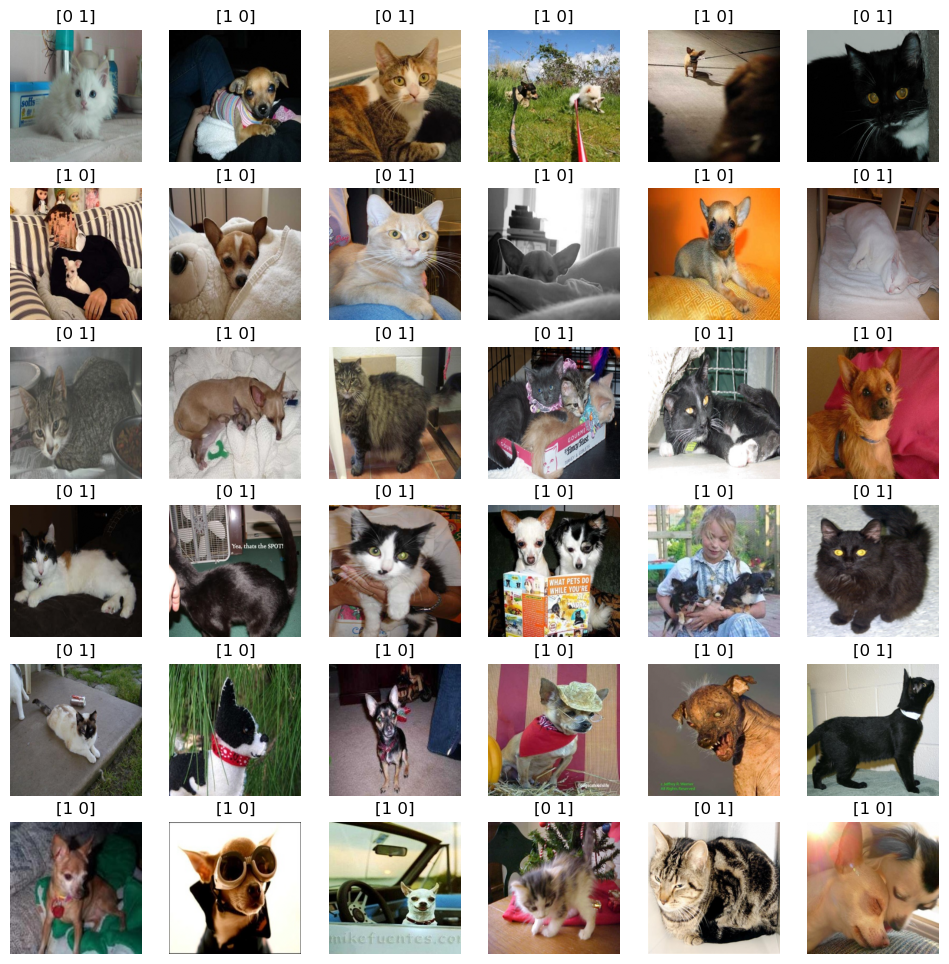

In [50]:
import random
import matplotlib.pyplot as plt

def show_sample_images(dataset):
    # these two variables are "the parameters" of this cell
    w = 6
    h = 6

    # this function uses the open, resize and array functions we have seen before
    _, axes_list = plt.subplots(h, w, figsize=(2*w, 2*h)) # define a grid of (w, h)

    for axes in axes_list:
        for ax in axes:
            ax.axis('off')
            idx = random.randrange(0, len(dataset['images']))
            ax.imshow(dataset['images'][idx]) # load and show
            ax.set_title(dataset['labels'][idx])
            
show_sample_images(training_data)

In [52]:
# AlexNet
# https://en.wikipedia.org/wiki/AlexNet
# import keras
# from tensorflow.keras.applications.resnet50 import ResNet50
import keras.api._v2.keras as keras
from keras import datasets, layers, models

dropout = 0.5 # Dropout, probability to keep units

model = models.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(w, h, channels)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(1, activation='sigmoid'))
model = keras.applications.ResNet50(weights=None, classes=2)



In [39]:
# TODO weight initialisation
# TODO learning rate scheduler
# print(model.get_weights())

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [54]:
# Parameters
learning_rate = 0.001
batch_size = 32
epochs=10

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print(model(training_data["images"][0][np.newaxis,]))

model.fit(training_data["images"], training_data["labels"],
          batch_size=batch_size, epochs=epochs,
          verbose=1,
          validation_data=(val_data["images"], val_data["labels"]))

Epoch 1/10


2023-03-23 23:16:15.319223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.7796 - accuracy: 0.6102

2023-03-23 23:17:37.140985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 90s 1s/step - loss: 0.7796 - accuracy: 0.6102 - val_loss: 23.2103 - val_accuracy: 0.4956
Epoch 2/10
62/62 [==============================] - 83s 1s/step - loss: 0.6600 - accuracy: 0.6384 - val_loss: 34.8003 - val_accuracy: 0.5015
Epoch 3/10
62/62 [==============================] - 87s 1s/step - loss: 0.7008 - accuracy: 0.6317 - val_loss: 1.7590 - val_accuracy: 0.5280
Epoch 4/10
62/62 [==============================] - 88s 1s/step - loss: 0.6561 - accuracy: 0.6578 - val_loss: 355.4851 - val_accuracy: 0.5103
Epoch 5/10
62/62 [==============================] - 83s 1s/step - loss: 0.6803 - accuracy: 0.6358 - val_loss: 175.6860 - val_accuracy: 0.5015
Epoch 6/10
62/62 [==============================] - 85s 1s/step - loss: 0.6160 - accuracy: 0.6818 - val_loss: 1.3848 - val_accuracy: 0.5133
Epoch 7/10
62/62 [==============================] - 84s 1s/step - loss: 0.6308 - accuracy: 0.6563 - val_loss: 2.5773 - val_accuracy: 0.4985
Epoch 8/10
62/62 [=======

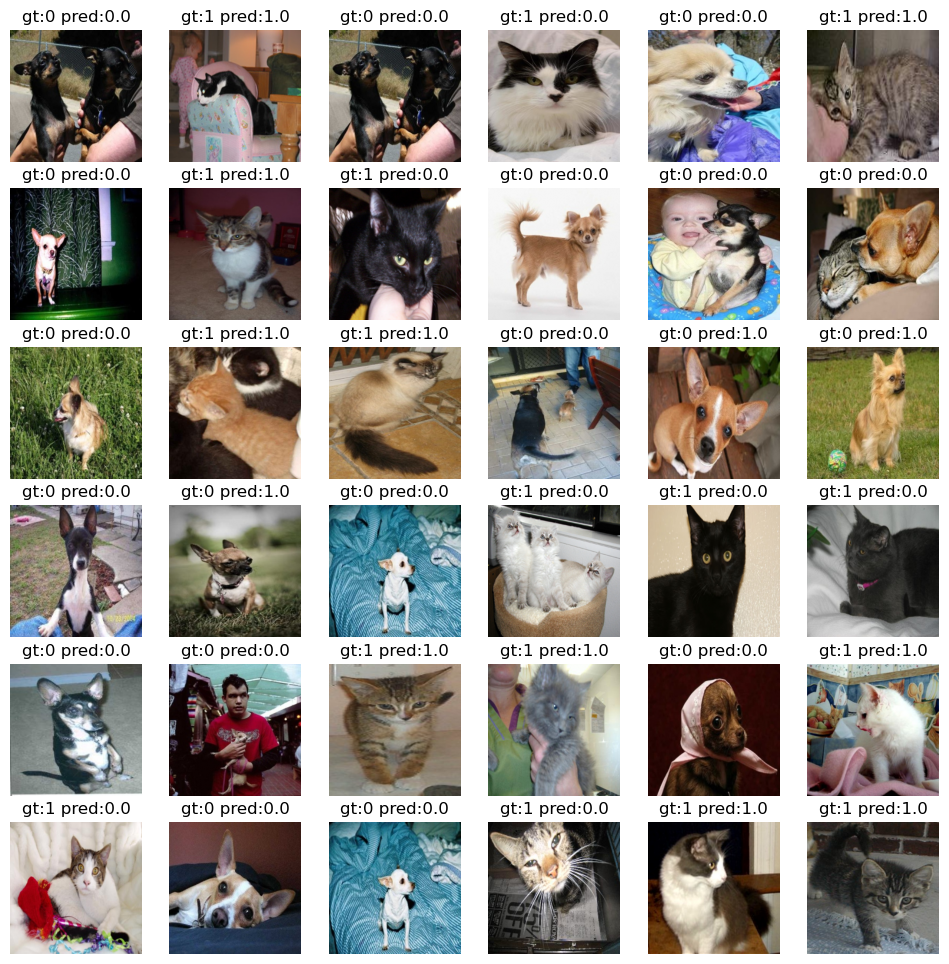

In [57]:
dataset = val_data
# these two variables are "the parameters" of this cell
w = 6
h = 6

# this function uses the open, resize and array functions we have seen before
_, axes_list = plt.subplots(h, w, figsize=(2*w, 2*h)) # define a grid of (w, h)

for axes in axes_list:
    for ax in axes:
        ax.axis('off')
        while True:
            idx = random.randrange(0, len(dataset['images']))
            gt = dataset['labels'][idx]
            pred = np.round(model(dataset['images'][idx][np.newaxis,])[0][0])
            # if gt != pred:
            break
        ax.imshow(dataset['images'][idx]) # load and show
        ax.set_title(f"gt:{np.arange(2)[gt.astype(bool)][0]} pred:{pred}")